In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set equation colors
c_ex = 'k'
c_dis = "#d65d17ff"
c_max = "#57db2fff"
c_mf = "#14b7ccff"

In [32]:
# load data
df = pd.read_csv('exp5_vGM_SAND/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])
print(f'fraction of valid configurations: {idx.mean():.2f}')
df.head()

fraction of valid configurations: 1.00


,stage,cl_cond,cl_th,aq_cond,aq_scale,aq_shape,aq_para,unsaturated,clogged,rel_err_mf,rel_err_dis,rel_err_max
0,2.245472,1.305104e-07,2.516085,0.000170,0.208800,5.085810,vGM,True,True,-0.066086,0.002333,0.006034
1,0.907086,3.041330e-07,2.850890,0.000109,0.285921,3.603365,vGM,True,True,-0.114957,0.007450,0.014768
2,0.341476,3.701476e-08,2.394651,0.001287,0.368172,3.634343,vGM,True,True,-0.284550,0.005666,0.026908
3,1.963215,2.273802e-08,1.593171,0.000017,0.180807,4.343345,vGM,True,True,-0.075897,0.001977,0.007328
4,0.823481,3.250068e-07,0.044282,0.000351,0.579104,2.717275,vGM,True,True,-0.466081,0.031810,0.084059


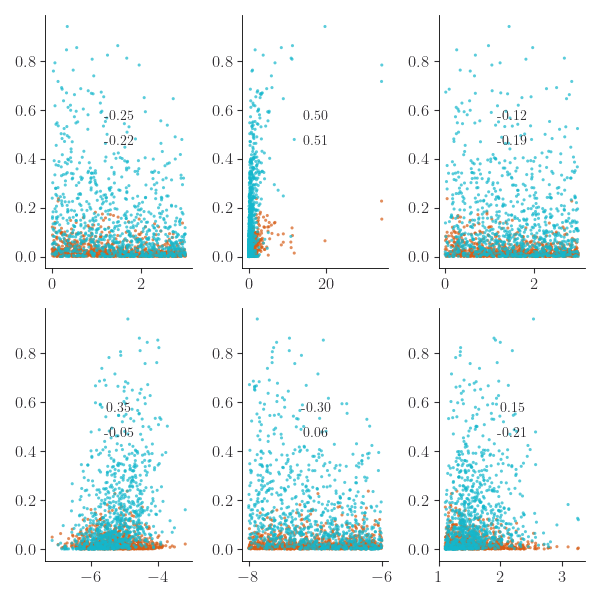

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(6, 6))

var = ['stage', 'cl_cond', 'cl_th', 'aq_cond', 'aq_scale', 'aq_shape']
scl = ['linear', 'log', 'linear', 'log', 'linear', 'linear']

for i in range(6):
    i1 = i % 2
    i2 = i % 3

    x = df.loc[idx, var[i]]
    if scl[i] == 'log': x = np.log10(x)

    y_ap = np.abs(df.loc[idx, 'q_ap'] - df.loc[idx, 'q_ex']) / df.loc[idx, 'q_ex']
    y_mf = np.abs(df.loc[idx, 'q_mf'] - df.loc[idx, 'q_ex']) / df.loc[idx, 'q_ex']

    axs[i1, i2].scatter(x, y_ap, c=c_dis, s=5, ec='None', alpha=0.7)
    axs[i1, i2].scatter(x, y_mf, c=c_mf, s=5, ec='None', alpha=0.7)




    p_ap = pearsonr(x, y_ap)
    axs[i1, i2].text(0.5, 0.5, f'{p_ap.statistic:.2f}',
                    transform = axs[i1, i2].transAxes,
                    horizontalalignment='center', verticalalignment='center')
    
    p_mf = pearsonr(x, y_mf)
    axs[i1, i2].text(0.5, 0.6, f'{p_mf.statistic:.2f}',
                    transform = axs[i1, i2].transAxes,
                    horizontalalignment='center', verticalalignment='center')





plt.tight_layout()